### Predict whether a customer will purchase a product(subscribe to a term deposite)
#### we'll use python with the pandas and scikit-learn libraries

#### step-by-step procedure

In [1]:
#step1: import required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

In [2]:
# Load the dataset 
df = pd.read_csv("bank.csv",sep=";")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [4]:
# basic info
print(df.info())
print(df['y'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB
None
y
no     4000
yes     521
Name: count, dtype: int64


In [8]:
#step4: preprocess the data 

## Encode categorical features using LabelEncoder:
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [9]:
#step5: # Split features and target
# split features (x) and target (y), then train-test split:
X = df.drop('y', axis=1)
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 

In [13]:
 #Step 6: Train the Decision Tree Classifier
clf = DecisionTreeClassifier(criterion='entropy',max_depth=5, random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

In [14]:
# step7: evaluate
y_pred = clf.predict(X_test)

print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.8975681650700074

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.94      1205
           1       0.58      0.32      0.41       152

    accuracy                           0.90      1357
   macro avg       0.75      0.64      0.68      1357
weighted avg       0.88      0.90      0.88      1357


Confusion Matrix:
 [[1170   35]
 [ 104   48]]


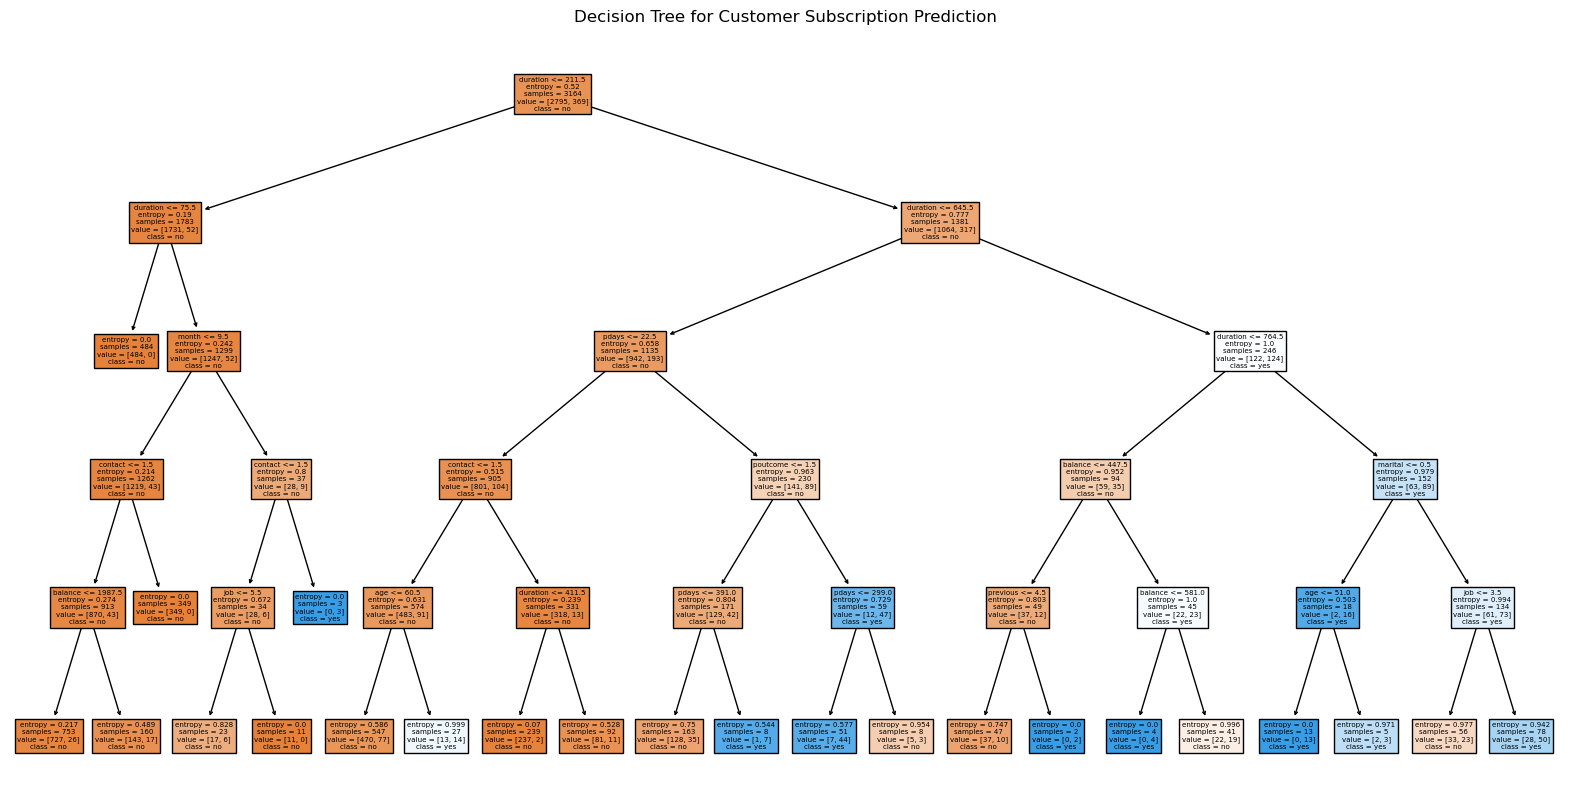

In [15]:
# Step 8: Visualize the decision tree
plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=X.columns, class_names=label_encoders['y'].classes_, filled=True)
plt.title("Decision Tree for Customer Subscription Prediction")
plt.show()

#### A decision tree classifier was successfully bulit to predict customer purchase behavior, revealing key influencing factors and providing a clear, interpretable model for targeted marketing.